# Iris Dataset : simpel eda

In [2]:
import pandas as pd

In [3]:
iris_df = pd.read_csv('IRIS.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# identifikasi bentuk dataset
iris_df.shape

(150, 5)

In [5]:
# daftar nama kolom 
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
# tipe data tiap kolom
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
# info dataset
iris_df.info() # -> karena methode harus ada kurung

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# identifikasi NA
iris_df.isna().values.any()

False

In [9]:
# identifikasi duplikasi tiap baris
iris_df[iris_df.duplicated()] # -> duplikasi data sekunder

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
iris_df.duplicated().value_counts()

False    147
True       3
dtype: int64

In [11]:
# hapus data duplikasi
iris_df.drop_duplicates(inplace=True)
iris_df.shape

(147, 5)

In [12]:
# deskripsi statistik dataset
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


In [13]:
# korelasi matrix
iris_df.corr()
# korelasi antara kolom

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


# Iris dataset : Data visualisation

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

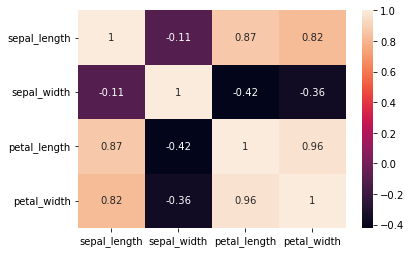

In [61]:
# heatmap
sns.heatmap(data=iris_df.corr(),annot=True)
plt.show()
# visualisasi paling cocok untuk memvisualisasikan korelasi matrix

In [16]:
# Barplot
iris_df['species'].value_counts()
# menghitung jumlah tiap kolom species

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

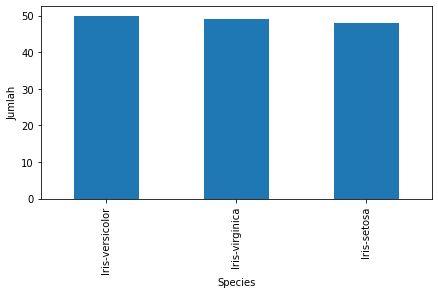

In [17]:
iris_df['species'].value_counts().plot.bar()
plt.tight_layout() # -> untuk mefitkan dg layar
plt.xlabel("Species")
plt.ylabel("Jumlah")
plt.show()

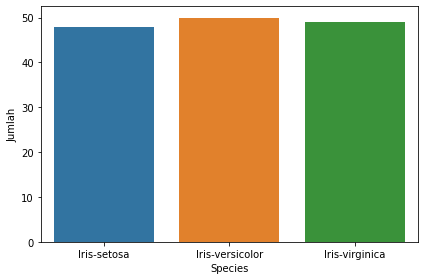

In [18]:
sns.countplot(data=iris_df, x='species')
plt.tight_layout()
plt.xlabel("Species")
plt.ylabel("Jumlah")
plt.show()

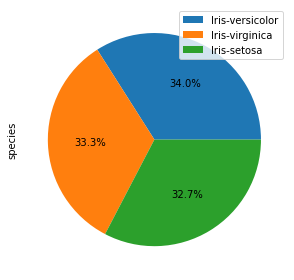

In [19]:
# Pie chart
iris_df['species'].value_counts().plot.pie(autopct='%1.1f%%', labels = None, legend = True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Petal Width')

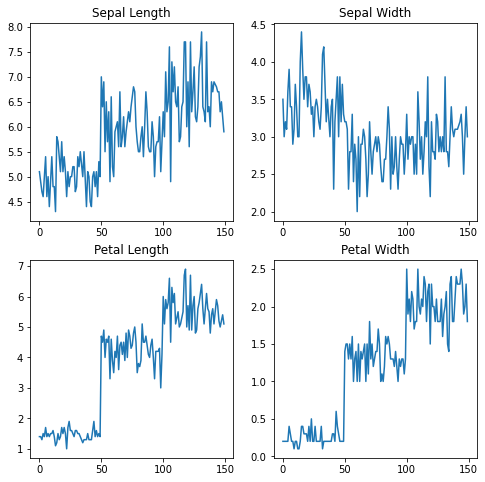

In [20]:
# Line Plot
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
# jumlah kolom dan baris 2
# untuk mengakses kolom dari suatu dataframe bisa menggunakan [] ata .
iris_df['sepal_length'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Sepal Length')

iris_df['sepal_width'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Sepal Width')

iris_df.petal_length.plot.line(ax=ax[1][0])
ax[1][0].set_title('Petal Length')

iris_df.petal_width.plot.line(ax=ax[1][1])
ax[1][1].set_title('Petal Width')

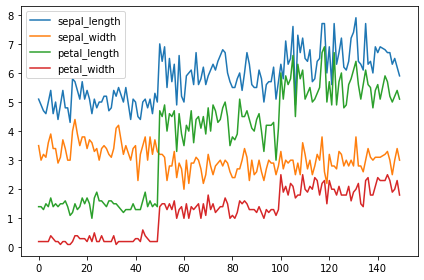

In [21]:
# menyatukan semua plot
iris_df.plot()
plt.tight_layout()

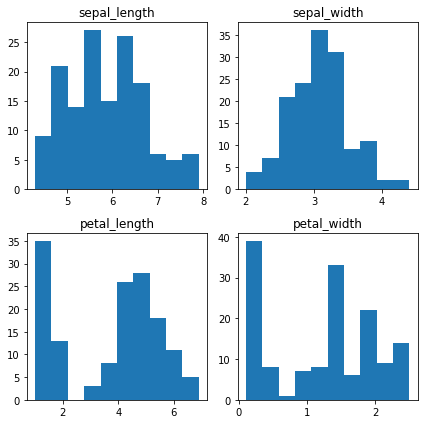

In [63]:
# Histogram
iris_df.hist(figsize=(6,6), grid=False, bins = 10)
plt.tight_layout()
plt.show()

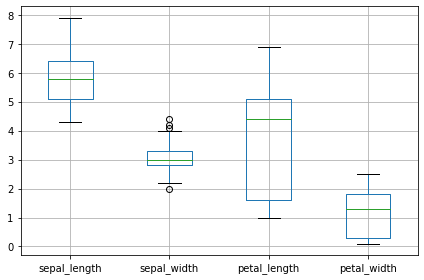

In [23]:
# Boxplot
iris_df.boxplot()
plt.tight_layout()
plt.show()
# pengelompokan berdasarkan nama kolom/variabel
# garis paling atas = max
# garis atas di kotak Q3
# garis hijau Q2(median)
# garis paling bawah di kotak Q1
# garis paling bawah = min

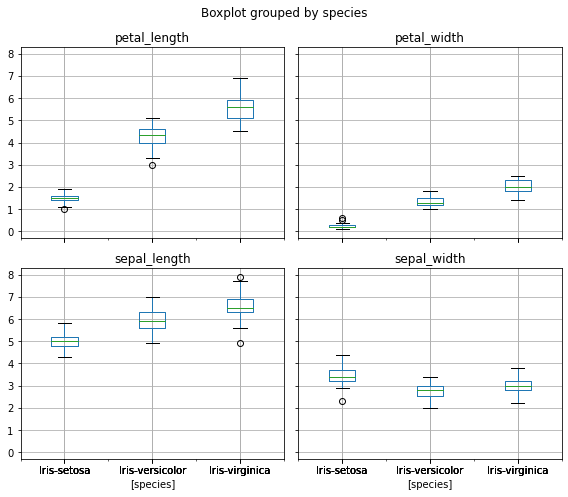

In [24]:
iris_df.boxplot(by="species", figsize=(8,7))
plt.tight_layout()
plt.show()
# kelompokan berdasarkan species

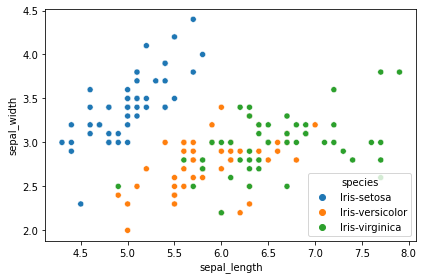

In [25]:
# Scatter Plot
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris_df, hue='species')
# plt.plot(x,y)
plt.tight_layout()
plt.show()
# hue/pengkategorian
# biasanya digunakan untuk mencari korelasi antar 2 variabel

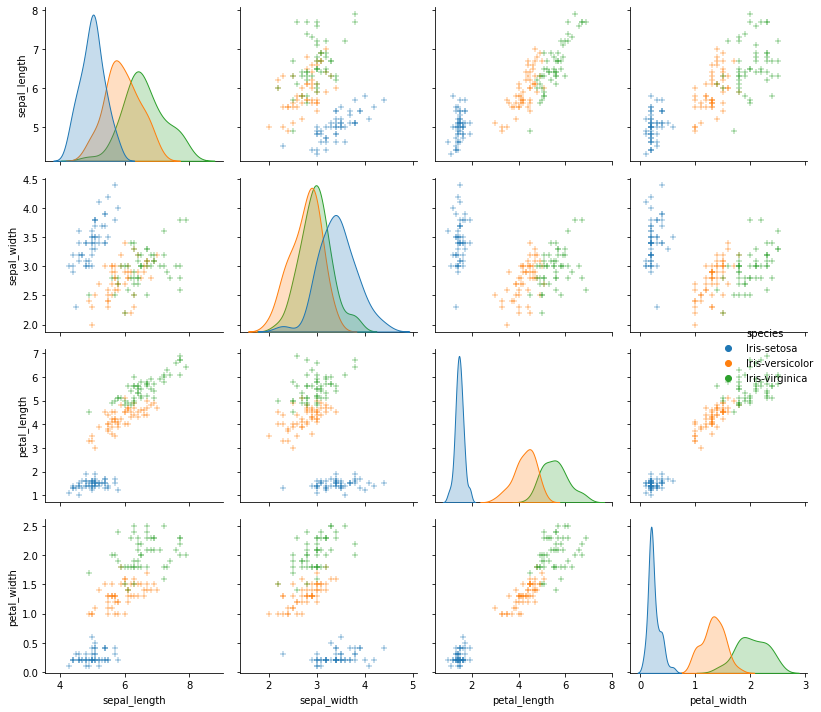

In [26]:
# Pair plot
sns.pairplot(iris_df, hue='species', markers='+')
plt.tight_layout()
plt.show()
# melihat seluruh korelasi antar kolom

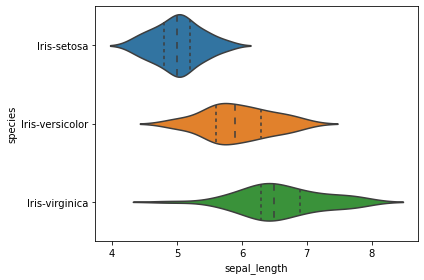

In [27]:
# Violin Plot
sns.violinplot(data=iris_df, y='species', x='sepal_length', inner='quartile') # inner = garis didalam plot
# bisa liat Q1,Q2,Q3
plt.tight_layout()
plt.show()

# Iris Dataset : Classification Models

In [71]:
from sklearn.model_selection import train_test_split # pembagian dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report # evaluasi performa

Dataset : features & Class Label

In [72]:
x = iris_df.drop(columns='species') # menempatkan features ke dalam variabel x, selain species
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
y = iris_df['species'] # menempatkan label/target ke dalam variabel y
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

Split dataset ke training dan testing

In [74]:
# membagi dataset ke dalam tarining dan testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4, random_state=10)
# test_size = 0.4 artinya training datasetnya 0.6 dan testingnya 0.4
print('training dataset')
print(x_train.shape)
print(y_train.shape)
print()
print('testing dataset')
print(x_test.shape)
print(y_test.shape)

training dataset
(88, 4)
(88,)

testing dataset
(59, 4)
(59,)


In [115]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[18  0  0]
 [ 0 20  1]
 [ 0  2 18]]


In [ ]:
# Classification Report
print(classification_report(y_test,y_pred)) # evaluasi klasifikasi

Algoritma KNearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
k_range = list(range(1,26)) # parameter neighbors/k mulai 1-25
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(x_train, y_train) # training model/classifier
    y_pred = model_knn.predict(x_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

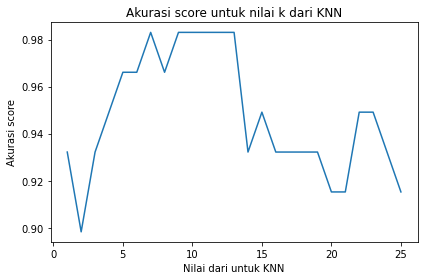

In [34]:
plt.plot(k_range, scores)
plt.xlabel('Nilai dari untuk KNN')
plt.ylabel('Akurasi score')
plt.title('Akurasi score untuk nilai k dari KNN')
plt.tight_layout()
plt.show()

In [35]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(x_train, y_train) # training model/classifier
y_pred = model_knn.predict(x_test) # melakukan prediksi

In [36]:
# Accuracy score
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.9322033898305084


In [37]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[18  0  0]
 [ 0 19  2]
 [ 0  2 18]]


In [38]:
# Classification Report
print(classification_report(y_test,y_pred)) # evaluasi klasifikasi

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.90      0.90      0.90        21
 Iris-virginica       0.90      0.90      0.90        20

       accuracy                           0.93        59
      macro avg       0.93      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59



Algoritma Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto') # melakukan konfigurasi algoritma
model_logreg.fit(x_train,y_train)
y_pred = model_logreg.predict(x_test)

In [41]:
# Accuracy score
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.9322033898305084


In [42]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[18  0  0]
 [ 0 20  1]
 [ 0  3 17]]


In [43]:
# Classification Report
print(classification_report(y_test,y_pred)) # evaluasi klasifikasi

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.87      0.95      0.91        21
 Iris-virginica       0.94      0.85      0.89        20

       accuracy                           0.93        59
      macro avg       0.94      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59



Algoritma Support Vector Classifier

In [44]:
from sklearn.svm import SVC

In [45]:
# model svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(x_train, y_train)
y_pred = model_svc.predict(x_test)

In [46]:
# Accuracy score
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.9661016949152542


In [47]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[18  0  0]
 [ 0 21  0]
 [ 0  2 18]]


In [48]:
# Classification Report
print(classification_report(y_test,y_pred)) # evaluasi klasifikasi

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.91      1.00      0.95        21
 Iris-virginica       1.00      0.90      0.95        20

       accuracy                           0.97        59
      macro avg       0.97      0.97      0.97        59
   weighted avg       0.97      0.97      0.97        59



Algoritma Decission Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred = model_svc.predict(x_test)

In [51]:
# Accuracy score
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.9661016949152542


In [52]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[18  0  0]
 [ 0 21  0]
 [ 0  2 18]]


In [53]:
# Classification Report
print(classification_report(y_test,y_pred)) # evaluasi klasifikasi

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.91      1.00      0.95        21
 Iris-virginica       1.00      0.90      0.95        20

       accuracy                           0.97        59
      macro avg       0.97      0.97      0.97        59
   weighted avg       0.97      0.97      0.97        59



Algoritma Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train, y_train)
pre_rf = model_rf.predict(x_test)

In [56]:
# Accuracy score
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.9661016949152542


In [57]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[18  0  0]
 [ 0 21  0]
 [ 0  2 18]]


In [58]:
# Classification Report
print(classification_report(y_test,y_pred)) # evaluasi klasifikasi

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.91      1.00      0.95        21
 Iris-virginica       1.00      0.90      0.95        20

       accuracy                           0.97        59
      macro avg       0.97      0.97      0.97        59
   weighted avg       0.97      0.97      0.97        59



Accuracy comparision for various models

In [117]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models :
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print(accuracy_scores)

[0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9491525423728814]


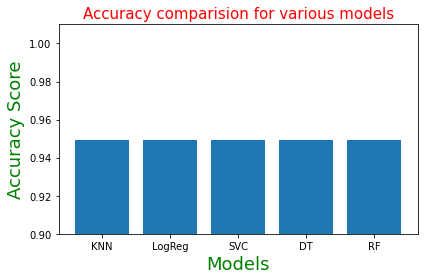

In [118]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.90,1.01)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()